In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('FinalDataSet_01.csv', index_col=0)
df2 = pd.read_csv('FinalDataSet_02.csv', index_col=0)
df3 = pd.read_csv('FinalDataSet_03.csv', index_col=0)
df4 = pd.read_csv('FinalDataSet_04.csv', index_col=0)
df5 = pd.read_csv('FinalDataSet_05.csv', index_col=0)
df6 = pd.read_csv('FinalDataSet_06.csv', index_col=0)
df7 = pd.read_csv('FinalDataSet_07.csv', index_col=0)
df8 = pd.read_csv('FinalDataSet_08.csv', index_col=0)
df9 = pd.read_csv('FinalDataSet_09.csv', index_col=0)
df10 = pd.read_csv('FinalDataSet_10.csv', index_col=0)

df_concat = pd.concat([df1,df2,df3,df4,df5,df6,df8,df9,df10], axis = 0)
df_concat = df_concat.drop_duplicates()

In [64]:
df_concat = df_concat.replace('no_data', np.nan)
df_concat = df_concat.replace('résultats', np.nan)
df_concat = df_concat.replace('résultat', np.nan)
df_concat = df_concat.replace('les', np.nan)
df_concat = df_concat.replace(' ', np.nan)
df = df_concat[df_concat['NbResults'].isna() == False]
df['NbResults'] = df['NbResults'].apply(lambda x: x.replace("\u202f",""))
df['NbResults'] = df['NbResults'].astype('int')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 4298
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2082 non-null   object 
 1   Platform         2082 non-null   object 
 2   Year             2082 non-null   int64  
 3   Genre            2082 non-null   object 
 4   Publisher        2081 non-null   object 
 5   DateSortie       2082 non-null   object 
 6   Studio           2029 non-null   object 
 7   Score            1923 non-null   float64
 8   Rate             1959 non-null   float64
 9   Review           1791 non-null   float64
 10  NA_Sales         2082 non-null   float64
 11  EU_Sales         2082 non-null   float64
 12  JP_Sales         2082 non-null   float64
 13  Other_Sales      2082 non-null   float64
 14  Global_Sales     2082 non-null   float64
 15  GK_licence       1648 non-null   object 
 16  GK_distributeur  330 non-null    object 
 17  Mois          

In [71]:
df.head(20)

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GK_licence,GK_distributeur,Mois,NbResults
0,Wii Sports,Wii,2006,Sports,Nintendo,2006-11-01,Nintendo,7.60,7.05,210.0,41.49,29.02,3.77,8.46,82.74,Wii Sports,Nintendo,11,25400
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,2008-04-01,Nintendo,7.60,8.00,319.0,15.85,12.88,3.79,3.31,35.82,Mario,NaN,4,13100
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2009-07-01,Nintendo,7.50,7.35,103.0,15.75,11.01,3.28,2.96,33.00,Wii Sports,NaN,7,6210
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,2006-05-01,Nintendo,8.45,8.10,229.0,11.38,9.23,6.50,2.90,30.01,Mario,NaN,5,16200
8,Wii Play,Wii,2006,Misc,Nintendo,2007-02-01,Nintendo,5.40,5.70,103.0,14.03,9.20,2.93,2.85,29.02,Wii Play,Nintendo,2,83800
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,2009-11-01,Nintendo,7.85,7.95,203.0,14.59,7.06,4.70,2.26,28.62,Mario,NaN,11,22700
11,Nintendogs,DS,2005,Simulation,Nintendo,2005-01-01,Nintendo,7.00,6.20,17.0,9.07,11.00,1.93,2.75,24.76,NaN,NaN,1,235
12,Mario Kart DS,DS,2005,Racing,Nintendo,2005-11-01,Nintendo,9.03,8.62,907.5,9.81,7.57,4.13,1.92,23.42,Mario,NaN,11,3890
14,Wii Fit,Wii,2007,Sports,Nintendo,2008-05-01,Nintendo,8.00,6.90,52.0,8.94,8.03,3.60,2.15,22.72,Touch Generations,NaN,5,18900
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,2009-10-01,Nintendo,8.00,7.05,29.0,9.09,8.59,2.53,1.79,22.00,Wii Fit,NaN,10,10400


In [85]:
df.groupby('Year').apply({'NbResults':'mean'})

TypeError: unhashable type: 'dict'

In [66]:
df.describe()

,Year,Score,Rate,Review,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Mois,NbResults
count,2082.000000,1923.000000,1959.000000,1791.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2.082000e+03
mean,2009.630163,7.029813,7.079423,145.130653,0.899635,0.609846,0.169524,0.221326,1.900538,7.060519,3.611517e+06
std,2.907614,1.285861,1.066876,253.436014,1.565093,1.165422,0.546675,0.377799,3.234874,3.684218,5.510154e+07
min,2005.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530000,1.000000,7.000000e+00
25%,2007.000000,6.215000,6.530000,14.500000,0.310000,0.160000,0.000000,0.060000,0.690000,3.000000,3.330000e+03
50%,2009.000000,7.230000,7.250000,53.500000,0.520000,0.330000,0.000000,0.110000,0.970000,9.000000,1.285000e+04
75%,2012.000000,7.970000,7.800000,150.500000,0.930000,0.640000,0.080000,0.220000,1.920000,10.000000,6.945000e+04
max,2016.000000,10.000000,10.000000,2129.500000,41.490000,29.020000,6.500000,8.460000,82.740000,12.000000,1.730000e+09


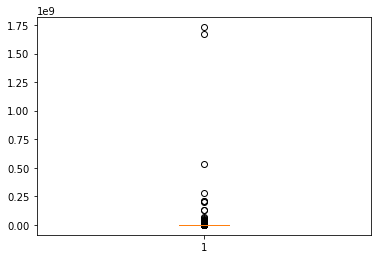

In [67]:
plt.boxplot(df.NbResults);

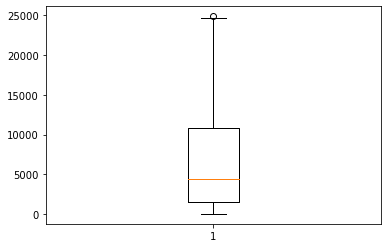

In [68]:
df_outliers = df[df['NbResults'] < 25000]
plt.boxplot(df_outliers.NbResults);

In [69]:
df_outliers.shape

(1287, 19)

<AxesSubplot:>

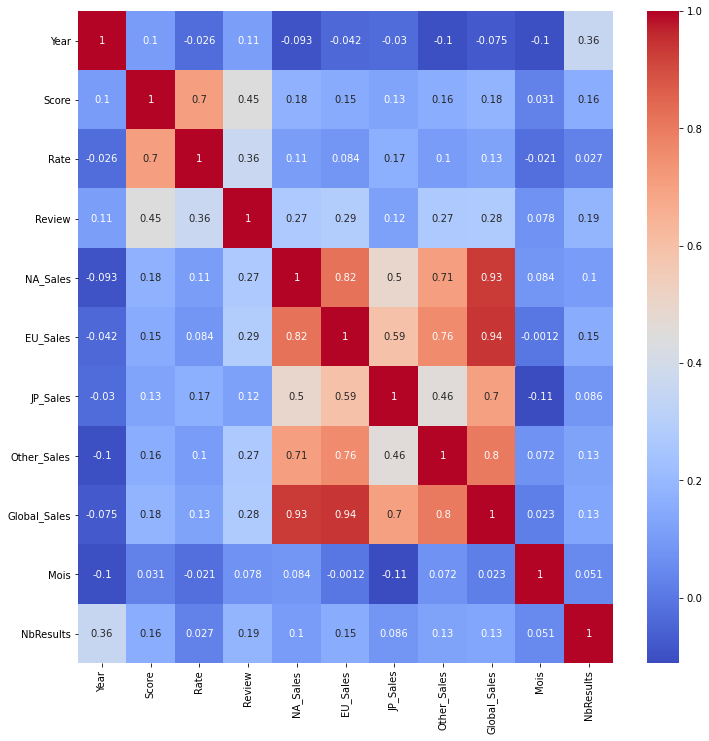

In [87]:
cor = df_outliers.corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(
    cor, 
    annot=True,
    ax=ax, 
    cmap='coolwarm'
)